In [1]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib import gridspec

with netCDF4.Dataset(
    "../eb-cc/freeboundary/STEP_SPP_001_EBCC_freeboundary.nc", "r"
) as db:
    equilibrium = db["equilibrium/0"]
    R = equilibrium["time_slice.profiles_2d.r"][0][0]
    Z = equilibrium["time_slice.profiles_2d.z"][0][0]
    psi = equilibrium["time_slice.profiles_2d.psi"][0][0]
    psi_b = equilibrium["time_slice.global_quantities.psi_boundary"][0]
    psi_0 = equilibrium["time_slice.global_quantities.psi_axis"][0]
    ffprime = equilibrium["time_slice.profiles_1d.f_df_dpsi"][:].flatten()
    pprime = equilibrium["time_slice.profiles_1d.dpressure_dpsi"][:].flatten()
    psi_1d = equilibrium["time_slice.profiles_1d.psi"][:].flatten()

    pf_active = db["pf_active/0"]
    coil_r = pf_active["coil.element.geometry.rectangle.r"][:].flatten()
    coil_z = pf_active["coil.element.geometry.rectangle.z"][:].flatten()
    coil_w = pf_active["coil.element.geometry.rectangle.width"][:].flatten()
    coil_h = pf_active["coil.element.geometry.rectangle.height"][:].flatten()

/home/theo/documents/ukaea/openstep/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:42: UserWarning: Warning: converting a masked element to nan.
  conv = _array_converter(obj)


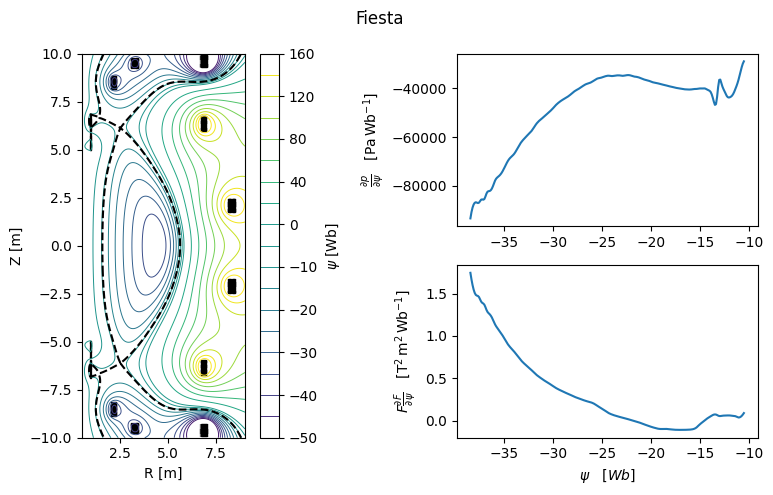

In [2]:
plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gs[:, 0])
norm = colors.TwoSlopeNorm(psi_b, vmin=1.5 * psi_0, vmax=0.7 * np.max(psi.flatten()))
plt.contour(
    R,
    Z,
    psi,
    norm=norm,
    levels=[
        -50,
        -45,
        -40,
        -35,
        -30,
        -25,
        -20,
        -15,
        -10,
        -5,
        0,
        20,
        40,
        60,
        80,
        100,
        120,
        140,
        160,
    ],
    linewidths=0.7,
)
plt.colorbar(label=r"$\psi$ [Wb]")
plt.contour(R, Z, psi, [psi_b], colors="k")

for r, z, w, h in zip(coil_r, coil_z, coil_w, coil_h):
    lower_left_x = r - w / 2
    lower_left_y = z - h / 2
    rectangle = plt.Rectangle((lower_left_x, lower_left_y), w, h, color="k")
    ax1.add_patch(rectangle)

ax1.set_aspect("equal")
plt.ylabel("Z [m]")
plt.xlabel("R [m]")

ax2 = plt.subplot(gs[0, 1])

ax2.plot(psi_1d, pprime.data)
ax2.set_ylabel(r"$\frac{\partial p}{\partial \psi} \quad \mathrm{[Pa \, Wb^{-1}]}$")

ax3 = plt.subplot(gs[1, 1])
ax3.plot(psi_1d, ffprime.data)
ax3.set_ylabel(
    r"$F \frac{\partial F}{\partial \psi} \quad \mathrm{[T^2 \, m^2 \, Wb^{-1}]}$"
)
ax3.set_xlabel(r"$\psi \quad [Wb]$")

plt.suptitle("Fiesta")
plt.tight_layout()
plt.savefig("free_boundary.png", dpi=1000)